In [49]:
#importing all the required python libraries 
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
%matplotlib inline
# from shapely.geometry import Point
# import folium
# from folium.plugins import MarkerCluster
# from folium.plugins import FastMarkerCluster


###### Importing the Airlines performance data for the month before the onset of COVID i.e. Feb20

In [14]:
States= gpd.read_file('US_States.geojson')

In [63]:
States.head()

,name,country,ISO3166-1-Alpha-3,state_code,id,geometry
0,Minnesota,United States of America,USA,MN,USA-3514,"POLYGON ((-89.59941 48.01027, -89.48888 48.013..."
1,Montana,United States of America,USA,MT,USA-3515,"POLYGON ((-111.19419 44.56116, -111.29155 44.7..."
2,North Dakota,United States of America,USA,ND,USA-3516,"POLYGON ((-96.60136 46.35136, -96.53891 46.199..."
3,Hawaii,United States of America,USA,HI,USA-3517,"MULTIPOLYGON (((-155.93665 19.05939, -155.9080..."
4,Idaho,United States of America,USA,ID,USA-3518,"POLYGON ((-111.04973 44.48816, -111.05024 42.0..."


In [16]:
Airports=pd.read_csv('US_Airports.csv')

In [17]:
Airports.head()

,iata,name,city,state,country,latitude,longitude
0,00M,Thigpen,Bay Springs,MS,USA,31.953765,-89.234505
1,00R,Livingston Municipal,Livingston,TX,USA,30.685861,-95.017928
2,00V,Meadow Lake,Colorado Springs,CO,USA,38.945749,-104.569893
3,01G,Perry-Warsaw,Perry,NY,USA,42.741347,-78.052081
4,01J,Hilliard Airpark,Hilliard,FL,USA,30.688012,-81.905944


In [24]:
Airports.shape

(3372, 7)

<AxesSubplot:>

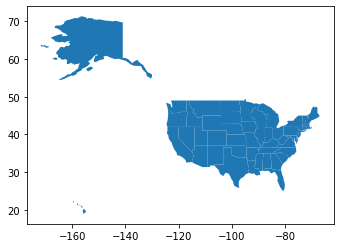

In [29]:
States.plot()

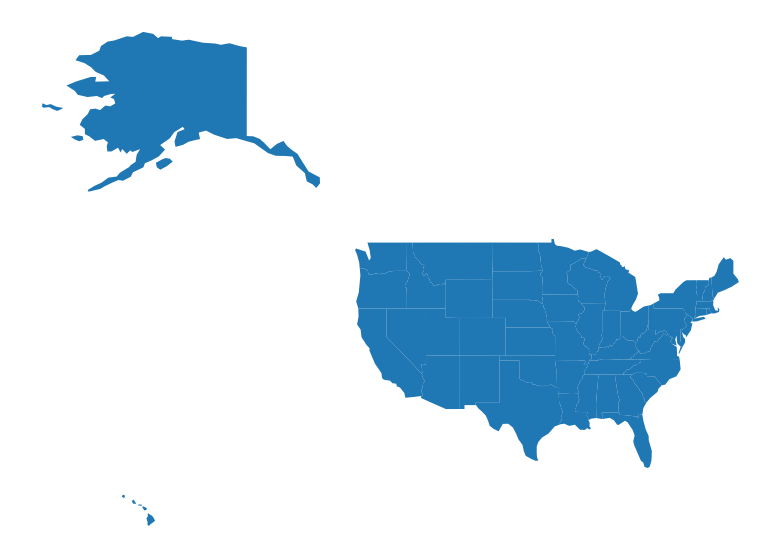

In [31]:
fig, ax = plt.subplots(figsize=(20,10))
States.plot(ax = ax)
ax.axis('off');

In [34]:
OTPFeb20 =pd.read_csv('Airlines OTP February20.csv',low_memory=False)

In [36]:
OTPFeb20.head()

,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,Marketing_Airline_Network,Operated_or_Branded_Code_Share_Partners,DOT_ID_Marketing_Airline,IATA_Code_Marketing_Airline,Flight_Number_Marketing_Airline,Originally_Scheduled_Code_Share_Airline,DOT_ID_Originally_Scheduled_Code_Share_Airline,IATA_Code_Originally_Scheduled_Code_Share_Airline,Flight_Num_Originally_Scheduled_Code_Share_Airline,Operating_Airline,DOT_ID_Operating_Airline,IATA_Code_Operating_Airline,Tail_Number,Flight_Number_Operating_Airline,OriginAirportID,OriginAirportSeqID,OriginCityMarketID,Origin,OriginCityName,OriginState,OriginStateFips,OriginStateName,OriginWac,DestAirportID,DestAirportSeqID,DestCityMarketID,Dest,DestCityName,DestState,DestStateFips,DestStateName,DestWac,CRSDepTime,DepTime,DepDelay,DepDelayMinutes,DepDel15,DepartureDelayGroups,DepTimeBlk,TaxiOut,WheelsOff,WheelsOn,TaxiIn,CRSArrTime,ArrTime,ArrDelay,ArrDelayMinutes,ArrDel15,ArrivalDelayGroups,ArrTimeBlk,Cancelled,CancellationCode,Diverted,CRSElapsedTime,ActualElapsedTime,AirTime,Flights,Distance,DistanceGroup,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,FirstDepTime,TotalAddGTime,LongestAddGTime,DivAirportLandings,DivReachedDest,DivActualElapsedTime,DivArrDelay,DivDistance,Div1Airport,Div1AirportID,Div1AirportSeqID,Div1WheelsOn,Div1TotalGTime,Div1LongestGTime,Div1WheelsOff,Div1TailNum,Div2Airport,Div2AirportID,Div2AirportSeqID,Div2WheelsOn,Div2TotalGTime,Div2LongestGTime,Div2WheelsOff,Div2TailNum,Div3Airport,Div3AirportID,Div3AirportSeqID,Div3WheelsOn,Div3TotalGTime,Div3LongestGTime,Div3WheelsOff,Div3TailNum,Div4Airport,Div4AirportID,Div4AirportSeqID,Div4WheelsOn,Div4TotalGTime,Div4LongestGTime,Div4WheelsOff,Div4TailNum,Div5Airport,Div5AirportID,Div5AirportSeqID,Div5WheelsOn,Div5TotalGTime,Div5LongestGTime,Div5WheelsOff,Div5TailNum,Duplicate
0,2020,1,2,1,6,2/1/2020,AA,AA_CODESHARE,19805,AA,3300,NaN,NaN,NaN,NaN,MQ,20398,MQ,N845AE,3300,11057,1105703,31057,CLT,"Charlotte, NC",NC,37,North Carolina,36,13139,1313902,33139,LYH,"Lynchburg, VA",VA,51,Virginia,38,1434,1430.0,-4.0,0.0,0.0,-1.0,1400-1459,20.0,1450.0,1526.0,5.0,1539,1531.0,-8.0,0.0,0.0,-1.0,1500-1559,0,NaN,0,65,61.0,36.0,1,175,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
1,2020,1,2,8,6,2/8/2020,AA,AA_CODESHARE,19805,AA,3300,NaN,NaN,NaN,NaN,MQ,20398,MQ,N800AE,3300,11057,1105703,31057,CLT,"Charlotte, NC",NC,37,North Carolina,36,13139,1313902,33139,LYH,"Lynchburg, VA",VA,51,Virginia,38,1434,1442.0,8.0,8.0,0.0,0.0,1400-1459,17.0,1459.0,1539.0,9.0,1539,1548.0,9.0,9.0,0.0,0.0,1500-1559,0,NaN,0,65,66.0,40.0,1,175,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
2,2020,1,2,13,4,2/13/2020,AA,AA_CODESHARE,19805,AA,3300,NaN,NaN,NaN,NaN,MQ,20398,MQ,N618AE,3300,11298,1129806,30194,DFW,"Dallas/Fort Worth, TX",TX,48,Texas,74,14814,1481402,30476,SHV,"Shreveport, LA",LA,22,Louisiana,72,2235,2247.0,12.0,12.0,0.0,0.0,2200-2259,28.0,2315.0,2354.0,2.0,2338,2356.0,18.0,18.0,1.0,1.0,2300-2359,0,NaN,0,63,69.0,39.0,1,190,1,0.0,0.0,6.0,0.0,12.0,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
3,2020,1,2,14,5,2/14/2020,AA,AA_CODESHARE,19805,AA,3300,NaN,NaN,NaN,NaN,MQ,20398,MQ,N824AE,3300,11298,1129806,30194,DFW,"Dallas/Fort Worth, TX",TX,48,Texas,74,14814,1481402,30476,SHV,"Shreveport, LA",LA,22,Louisiana,72,2235,2230.0,-5.0,0.0,0.0,-1.0,2200-2259,15.0,2245.0,2317.0,4.0,2338,2321.0,-17.0,0.0,0.0,-2.0,2300-2359,0,NaN,0,63,51.0,32.0,1,190,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [37]:
OTPFeb20.columns

Index(['Year', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek', 'FlightDate',
       'Marketing_Airline_Network', 'Operated_or_Branded_Code_Share_Partners',
       'DOT_ID_Marketing_Airline', 'IATA_Code_Marketing_Airline',
       ...
       'Div4TailNum', 'Div5Airport', 'Div5AirportID', 'Div5AirportSeqID',
       'Div5WheelsOn', 'Div5TotalGTime', 'Div5LongestGTime', 'Div5WheelsOff',
       'Div5TailNum', 'Duplicate'],
      dtype='object', length=119)

In [38]:
OTPFeb20.shape

(623103, 119)

###### Removing all the unnecessary columns from OTPFeb20 Data frame and Keep the data frame one the remaining columns 

In [41]:

# OTPFeb20 = OTPFeb20.loc[['Year','Month','DayofMonth','DayOfWeek','FlightDate','DOT_ID_Marketing_Airline','IATA_Code_Marketing_Airline',
# 'Flight_Number_Marketing_Airline','Operating_Airline','Flight_Number_Operating_Airline','OriginAirportID','OriginCityMarketID','Origin',
# 'OriginCityName','OriginState','OriginStateName','DestAirportID','Dest','DestCityName','DestState','DestStateName','CRSDepTime',
# 'DepTime','DepDelay','DepDelayMinutes','TaxiOut','WheelsOff','WheelsOn','TaxiIn','CRSArrTime','ArrTime','ArrDelay','ArrDelayMinutes',
# 'Cancelled','Diverted','CRSElapsedTime','ActualElapsedTime','AirTime','CarrierDelay','WeatherDelay','NASDelay','SecurityDelay','LateAircraftDelay',
# 'TotalAddGTime','DivAirportLandings','Duplicate']]

column ={'Year','Month','DayofMonth','DayOfWeek','FlightDate','DOT_ID_Marketing_Airline','IATA_Code_Marketing_Airline',
'Flight_Number_Marketing_Airline','Flight_Number_Operating_Airline','OriginAirportID','OriginCityMarketID','Origin',
'OriginCityName','OriginState','OriginStateName','DestAirportID','Dest','DestCityName','DestState','DestStateName','CRSDepTime',
'DepTime','DepDelay','DepDelayMinutes','TaxiOut','WheelsOff','WheelsOn','TaxiIn','CRSArrTime','ArrTime','ArrDelay','ArrDelayMinutes',
'Cancelled','Diverted','CRSElapsedTime','ActualElapsedTime','AirTime','CarrierDelay','WeatherDelay','NASDelay','SecurityDelay','LateAircraftDelay',
'TotalAddGTime','DivAirportLandings','Duplicate'}
pd.set_option('display.max_columns', 46)
OTPFeb20 =OTPFeb20[column]


In [42]:
OTPFeb20

,CRSDepTime,Year,IATA_Code_Marketing_Airline,Dest,Month,OriginCityName,CRSElapsedTime,Cancelled,OriginStateName,LateAircraftDelay,OriginState,DestAirportID,DOT_ID_Marketing_Airline,DayOfWeek,OriginCityMarketID,ActualElapsedTime,DestState,TotalAddGTime,DepDelayMinutes,NASDelay,AirTime,SecurityDelay,Duplicate,Origin,Diverted,WeatherDelay,DivAirportLandings,ArrDelayMinutes,DepTime,WheelsOn,WheelsOff,TaxiOut,ArrTime,ArrDelay,DestCityName,FlightDate,DayofMonth,DepDelay,OriginAirportID,TaxiIn,DestStateName,CarrierDelay,Flight_Number_Marketing_Airline,Flight_Number_Operating_Airline,CRSArrTime
0,1434,2020,AA,LYH,2,"Charlotte, NC",65,0,North Carolina,NaN,NC,13139,19805,6,31057,61.0,VA,NaN,0.0,NaN,36.0,NaN,N,CLT,0,NaN,0,0.0,1430.0,1526.0,1450.0,20.0,1531.0,-8.0,"Lynchburg, VA",2/1/2020,1,-4.0,11057,5.0,Virginia,NaN,3300,3300,1539
1,1434,2020,AA,LYH,2,"Charlotte, NC",65,0,North Carolina,NaN,NC,13139,19805,6,31057,66.0,VA,NaN,8.0,NaN,40.0,NaN,N,CLT,0,NaN,0,9.0,1442.0,1539.0,1459.0,17.0,1548.0,9.0,"Lynchburg, VA",2/8/2020,8,8.0,11057,9.0,Virginia,NaN,3300,3300,1539
2,2235,2020,AA,SHV,2,"Dallas/Fort Worth, TX",63,0,Texas,12.0,TX,14814,19805,4,30194,69.0,LA,NaN,12.0,6.0,39.0,0.0,N,DFW,0,0.0,0,18.0,2247.0,2354.0,2315.0,28.0,2356.0,18.0,"Shreveport, LA",2/13/2020,13,12.0,11298,2.0,Louisiana,0.0,3300,3300,2338
3,2235,2020,AA,SHV,2,"Dallas/Fort Worth, TX",63,0,Texas,NaN,TX,14814,19805,5,30194,51.0,LA,NaN,0.0,NaN,32.0,NaN,N,DFW,0,NaN,0,0.0,2230.0,2317.0,2245.0,15.0,2321.0,-17.0,"Shreveport, LA",2/14/2020,14,-5.0,11298,4.0,Louisiana,NaN,3300,3300,2338
4,2235,2020,AA,SHV,2,"Dallas/Fort Worth, TX",63,0,Texas,NaN,TX,14814,19805,6,30194,62.0,LA,NaN,11.0,NaN,31.0,NaN,N,DFW,0,NaN,0,10.0,2246.0,2343.0,2312.0,26.0,2348.0,10.0,"Shreveport, LA",2/15/2020,15,11.0,11298,5.0,Louisiana,NaN,3300,3300,2338
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
623098,1424,2020,UA,ORD,2,"Detroit, MI",91,0,Michigan,0.0,MI,13930,19977,4,31295,113.0,IL,NaN,78.0,22.0,54.0,0.0,N,DTW,0,0.0,0,100.0,1542.0,1618.0,1624.0,42.0,1635.0,100.0,"Chicago, IL",2/6/2020,6,78.0,11433,17.0,Illinois,78.0,4539,3151,1455
623099,1125,2020,UA,DTW,2,"Chicago, IL",83,0,Illinois,0.0,IL,11433,19977,4,30977,121.0,MI,NaN,54.0,38.0,50.0,0.0,N,ORD,0,0.0,0,92.0,1219.0,1514.0,1324.0,65.0,1520.0,92.0,"Detroit, MI",2/6/2020,6,54.0,13930,6.0,Michigan,54.0,4521,3150,1348
623100,1540,2020,UA,DTW,2,"Chicago, IL",86,0,Illinois,0.0,IL,11433,19977,4,30977,131.0,MI,NaN,0.0,44.0,58.0,0.0,N,ORD,0,0.0,0,44.0,1539.0,1840.0,1642.0,63.0,1850.0,44.0,"Detroit, MI",2/6/2020,6,-1.0,13930,10.0,Michigan,0.0,4509,3211,1806
623101,1936,2020,UA,ORD,2,"Detroit, MI",91,0,Michigan,0.0,MI,13930,19977,4,31295,148.0,IL,NaN,0.0,57.0,53.0,0.0,N,DTW,0,0.0,0,57.0,1936.0,2042.0,2049.0,73.0,2104.0,57.0,"Chicago, IL",2/6/2020,6,0.0,11433,22.0,Illinois,0.0,4509,3212,2007


###### Including two calculated boolean fields into the data Frame , to calculate Departure and Arrival Delays  

In [44]:
OTPFeb20['Dep_Delay15'] = np.where(OTPFeb20['DepDelayMinutes']>=15,1,0)
OTPFeb20['Arr_Delay15'] = np.where(OTPFeb20['ArrDelayMinutes']>=15,1,0)

In [46]:
pd.set_option('display.max_columns', 48)
OTPFeb20.head()

,CRSDepTime,Year,IATA_Code_Marketing_Airline,Dest,Month,OriginCityName,CRSElapsedTime,Cancelled,OriginStateName,LateAircraftDelay,OriginState,DestAirportID,DOT_ID_Marketing_Airline,DayOfWeek,OriginCityMarketID,ActualElapsedTime,DestState,TotalAddGTime,DepDelayMinutes,NASDelay,AirTime,SecurityDelay,Duplicate,Origin,Diverted,WeatherDelay,DivAirportLandings,ArrDelayMinutes,DepTime,WheelsOn,WheelsOff,TaxiOut,ArrTime,ArrDelay,DestCityName,FlightDate,DayofMonth,DepDelay,OriginAirportID,TaxiIn,DestStateName,CarrierDelay,Flight_Number_Marketing_Airline,Flight_Number_Operating_Airline,CRSArrTime,Dep_Delay15,Arr_Delay15
0,1434,2020,AA,LYH,2,"Charlotte, NC",65,0,North Carolina,NaN,NC,13139,19805,6,31057,61.0,VA,NaN,0.0,NaN,36.0,NaN,N,CLT,0,NaN,0,0.0,1430.0,1526.0,1450.0,20.0,1531.0,-8.0,"Lynchburg, VA",2/1/2020,1,-4.0,11057,5.0,Virginia,NaN,3300,3300,1539,0,0
1,1434,2020,AA,LYH,2,"Charlotte, NC",65,0,North Carolina,NaN,NC,13139,19805,6,31057,66.0,VA,NaN,8.0,NaN,40.0,NaN,N,CLT,0,NaN,0,9.0,1442.0,1539.0,1459.0,17.0,1548.0,9.0,"Lynchburg, VA",2/8/2020,8,8.0,11057,9.0,Virginia,NaN,3300,3300,1539,0,0
2,2235,2020,AA,SHV,2,"Dallas/Fort Worth, TX",63,0,Texas,12.0,TX,14814,19805,4,30194,69.0,LA,NaN,12.0,6.0,39.0,0.0,N,DFW,0,0.0,0,18.0,2247.0,2354.0,2315.0,28.0,2356.0,18.0,"Shreveport, LA",2/13/2020,13,12.0,11298,2.0,Louisiana,0.0,3300,3300,2338,0,1
3,2235,2020,AA,SHV,2,"Dallas/Fort Worth, TX",63,0,Texas,NaN,TX,14814,19805,5,30194,51.0,LA,NaN,0.0,NaN,32.0,NaN,N,DFW,0,NaN,0,0.0,2230.0,2317.0,2245.0,15.0,2321.0,-17.0,"Shreveport, LA",2/14/2020,14,-5.0,11298,4.0,Louisiana,NaN,3300,3300,2338,0,0
4,2235,2020,AA,SHV,2,"Dallas/Fort Worth, TX",63,0,Texas,NaN,TX,14814,19805,6,30194,62.0,LA,NaN,11.0,NaN,31.0,NaN,N,DFW,0,NaN,0,10.0,2246.0,2343.0,2312.0,26.0,2348.0,10.0,"Shreveport, LA",2/15/2020,15,11.0,11298,5.0,Louisiana,NaN,3300,3300,2338,0,0


In [61]:
#Unknown =gpd.read_file('osm-world-airports.geojson')

In [62]:
# pd.set_option('display.max_rows', 500)
# Unknown

In [65]:
OTPAug20 =pd.read_csv('Airlines OTP August20.csv',low_memory=False)

In [66]:
OTPAug20.head()

,Year,QUARTER,Month,DayofMonth,DayOfWeek,FlightDate,MKT_UNIQUE_CARRIER,BRANDED_CODE_SHARE,DOT_ID_Marketing_Airline,Marketing_Id,...,DIV5_AIRPORT,DIV5_AIRPORT_ID,DIV5_AIRPORT_SEQ_ID,DIV5_WHEELS_ON,DIV5_TOTAL_GTIME,DIV5_LONGEST_GTIME,DIV5_WHEELS_OFF,DIV5_TAIL_NUM,Unnamed: 119,Duplicate
0,2020,3,8,24,1,8/24/2020,WN,WN,19393,WN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020,3,8,24,1,8/24/2020,WN,WN,19393,WN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020,3,8,24,1,8/24/2020,WN,WN,19393,WN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020,3,8,24,1,8/24/2020,WN,WN,19393,WN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020,3,8,24,1,8/24/2020,WN,WN,19393,WN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


###### The column headers for this dataframe are not like the first one , Therefore capitalizing the column names demanded here 

In [67]:
#OTPAug20.columns = [str(x).capitalize() for x in OTPAug20.columns]

In [68]:
#OTPAug20.head()

###### Removing all the unnecessary columns from OTPAug20 Data frame and Keep the data frame on the remaining columns

In [69]:
column ={'Year','Month','DayofMonth','DayOfWeek','FlightDate','DOT_ID_Marketing_Airline','IATA_Code_Marketing_Airline',
'Flight_Number_Marketing_Airline','Flight_Number_Operating_Airline','OriginAirportID','OriginCityMarketID','Origin',
'OriginCityName','OriginState','OriginStateName','DestAirportID','Dest','DestCityName','DestState','DestStateName','CRSDepTime',
'DepTime','DepDelay','DepDelayMinutes','TaxiOut','WheelsOff','WheelsOn','TaxiIn','CRSArrTime','ArrTime','ArrDelay','ArrDelayMinutes',
'Cancelled','Diverted','CRSElapsedTime','ActualElapsedTime','AirTime','CarrierDelay','WeatherDelay','NASDelay','SecurityDelay','LateAircraftDelay',
'TotalAddGTime','DivAirportLandings','Duplicate'}

OTPAug20 =OTPAug20[column]


In [70]:
OTPAug20

,WeatherDelay,LateAircraftDelay,Month,ArrDelay,ActualElapsedTime,Origin,DOT_ID_Marketing_Airline,TaxiIn,FlightDate,DepTime,...,DestCityName,OriginState,OriginCityMarketID,DayOfWeek,AirTime,WheelsOff,DepDelayMinutes,DestStateName,DayofMonth,DestState
0,NaN,NaN,8,-8.0,195.0,DEN,19393,3.0,8/24/2020,1542.0,...,"Baltimore, MD",CO,30325,1,183.0,1551.0,0.0,Maryland,24,MD
1,NaN,NaN,8,-8.0,162.0,DEN,19393,5.0,8/24/2020,1950.0,...,"Cleveland, OH",CO,30325,1,144.0,2003.0,0.0,Ohio,24,OH
2,NaN,NaN,8,-1.0,167.0,DEN,19393,5.0,8/24/2020,1332.0,...,"Cleveland, OH",CO,30325,1,151.0,1343.0,0.0,Ohio,24,OH
3,NaN,NaN,8,-8.0,159.0,DEN,19393,2.0,8/24/2020,1408.0,...,"Columbus, OH",CO,30325,1,147.0,1418.0,0.0,Ohio,24,OH
4,NaN,NaN,8,5.0,161.0,DEN,19393,5.0,8/24/2020,1944.0,...,"Columbus, OH",CO,30325,1,143.0,1957.0,0.0,Ohio,24,OH
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
398465,NaN,NaN,8,-34.0,349.0,EWR,19977,5.0,8/21/2020,835.0,...,"San Francisco, CA",NJ,31703,5,328.0,851.0,0.0,California,21,CA
398466,NaN,NaN,8,-16.0,77.0,DEN,19977,4.0,8/21/2020,1147.0,...,"Salt Lake City, UT",CO,30325,5,59.0,1201.0,0.0,Utah,21,UT
398467,NaN,NaN,8,-13.0,140.0,PDX,19977,6.0,8/21/2020,525.0,...,"Denver, CO",OR,34057,5,119.0,540.0,0.0,Colorado,21,CO
398468,NaN,NaN,8,-16.0,199.0,IAH,19977,7.0,8/21/2020,653.0,...,"Newark, NJ",TX,31453,5,179.0,706.0,0.0,New Jersey,21,NJ


In [71]:
OTPFeb21 = pd.read_csv('Airlines OTP February21.csv',low_memory=False)

In [72]:
OTPFeb21.head()

,Year,QUARTER,Month,DayofMonth,DayOfWeek,FlightDate,MKT_UNIQUE_CARRIER,BRANDED_CODE_SHARE,DOT_ID_Marketing_Airline,Marketing_Id,...,DIV5_AIRPORT,DIV5_AIRPORT_ID,DIV5_AIRPORT_SEQ_ID,DIV5_WHEELS_ON,DIV5_TOTAL_GTIME,DIV5_LONGEST_GTIME,DIV5_WHEELS_OFF,DIV5_TAIL_NUM,Unnamed: 119,Duplicate
0,2021,1,2,21,7,2/21/2021,DL,DL,19790,DL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2021,1,2,21,7,2/21/2021,DL,DL,19790,DL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2021,1,2,21,7,2/21/2021,DL,DL,19790,DL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2021,1,2,21,7,2/21/2021,DL,DL,19790,DL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2021,1,2,21,7,2/21/2021,DL,DL,19790,DL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
#OTPFeb21.columns = [str(x).capitalize() for x in OTPFeb21.columns]

In [73]:
column ={'Year','Month','DayofMonth','DayOfWeek','FlightDate','DOT_ID_Marketing_Airline','IATA_Code_Marketing_Airline',
'Flight_Number_Marketing_Airline','Flight_Number_Operating_Airline','OriginAirportID','OriginCityMarketID','Origin',
'OriginCityName','OriginState','OriginStateName','DestAirportID','Dest','DestCityName','DestState','DestStateName','CRSDepTime',
'DepTime','DepDelay','DepDelayMinutes','TaxiOut','WheelsOff','WheelsOn','TaxiIn','CRSArrTime','ArrTime','ArrDelay','ArrDelayMinutes',
'Cancelled','Diverted','CRSElapsedTime','ActualElapsedTime','AirTime','CarrierDelay','WeatherDelay','NASDelay','SecurityDelay','LateAircraftDelay',
'TotalAddGTime','DivAirportLandings','Duplicate'}

OTPFeb21 =OTPFeb21[column]


In [74]:
OTPFeb21

,WeatherDelay,LateAircraftDelay,Month,ArrDelay,ActualElapsedTime,Origin,DOT_ID_Marketing_Airline,TaxiIn,FlightDate,DepTime,...,DestCityName,OriginState,OriginCityMarketID,DayOfWeek,AirTime,WheelsOff,DepDelayMinutes,DestStateName,DayofMonth,DestState
0,NaN,NaN,2,-5.0,96.0,SMF,19790,4.0,2/21/2021,1338.0,...,"Salt Lake City, UT",CA,33192,7,80.0,1350.0,0.0,Utah,21,UT
1,0.0,0.0,2,135.0,88.0,ATL,19790,5.0,2/21/2021,1448.0,...,"Cleveland, OH",GA,30397,7,73.0,1458.0,147.0,Ohio,21,OH
2,0.0,105.0,2,139.0,133.0,CLE,19790,7.0,2/21/2021,1711.0,...,"Atlanta, GA",OH,30647,7,86.0,1751.0,115.0,Georgia,21,GA
3,NaN,NaN,2,-21.0,58.0,ATL,19790,6.0,2/21/2021,1635.0,...,"Charlotte, NC",GA,30397,7,40.0,1647.0,0.0,North Carolina,21,NC
4,NaN,NaN,2,-10.0,77.0,CLT,19790,6.0,2/21/2021,1853.0,...,"Atlanta, GA",NC,31057,7,43.0,1921.0,0.0,Georgia,21,GA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350165,NaN,NaN,2,-1.0,68.0,EWR,19977,3.0,2/27/2021,1830.0,...,"Portland, ME",NJ,31703,6,47.0,1848.0,5.0,Maine,27,ME
350166,0.0,0.0,2,53.0,149.0,EWR,19977,8.0,2/28/2021,1900.0,...,"Indianapolis, IN",NJ,31703,7,118.0,1923.0,45.0,Indiana,28,IN
350167,0.0,0.0,2,427.0,117.0,ATL,19977,7.0,2/28/2021,1410.0,...,"Chicago, IL",GA,30397,7,95.0,1425.0,445.0,Illinois,28,IL
350168,106.0,899.0,2,1005.0,92.0,EWR,19977,10.0,2/15/2021,1128.0,...,"Cleveland, OH",NJ,31703,1,69.0,1141.0,1013.0,Ohio,15,OH
